# Introduction to the Pre-Trained Cloud API's

A collection of pre-trained models to achieve common task with simple API calls.  This notebook will demonstrate many of these APIs from Python so that you can include them in your ML workflows to augment data for further model training.  

  - [Cloud Vision API](https://cloud.google.com/vision)
      - [Cloud Document AI API](https://cloud.google.com/document-ai)
  - [Cloud DLP API](https://cloud.google.com/dlp)
  - [Cloud Natural Language API](https://cloud.google.com/natural-language)
      - [Cloud Text to Speech API](https://cloud.google.com/text-to-speech)
      - [Cloud Speech to Text API](https://cloud.google.com/speech-to-text)
  - [Cloud Translation API](https://cloud.google.com/translate)

---
## Setup

### Package Installs (if needed)

In [1]:
try: import google.cloud.translate
except ImportError:
    print('You need to pip install google-cloud-translate, ... commencing')
    !pip install google-cloud-translate -U -q

try: import google.cloud.vision
except ImportError:
    print('You need to pip install google-cloud-vision, ... commencing')
    !pip install google-cloud-vision -U -q

try: import google.cloud.documentai
except ImportError:
    print('You need to pip install google-cloud-documentai, ... commencing')
    !pip install google-cloud-documentai -U -q

try: import google.cloud.dlp
except ImportError:
    print('You need to pip install google-cloud-dlp, ... commencing')
    !pip install google-cloud-dlp -U -q

try: import google.cloud.speech
except ImportError:
    print('You need to pip install google-cloud-speech, ... commencing')
    !pip install google-cloud-speech -U -q

try: import google.cloud.texttospeech
except ImportError:
    print('You need to pip install google-cloud-texttospeech, ... commencing')
    !pip install google-cloud-texttospeech -U -q

try: import google.cloud.language
except ImportError:
    print('You need to pip install google-cloud-language, ... commencing')
    !pip install google-cloud-language -U -q

### Environment

inputs:

In [2]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [3]:
SERIES = 'applied_apis'
EXPERIMENT = 'api_fun'

REGION = 'us-central1'

packages:

In [4]:
import os
import base64
from IPython import display
from prettytable import PrettyTable
from google.cloud import storage
from google.cloud import service_usage_v1

clients:

In [5]:
gcs_client = storage.Client()
su_client = service_usage_v1.ServiceUsageClient()

parameters:

In [6]:
DIR = f"temp/{EXPERIMENT}"

environment:

In [7]:
!rm -rf {DIR}
!mkdir -p {DIR}

### Enable APIs

In [8]:
def enable_api(api_name):
    api_check = su_client.get_service(
        request = service_usage_v1.GetServiceRequest(
            name = f'projects/{PROJECT_ID}/services/{api_name}.googleapis.com'
        )
    ).state.name


    if api_check == 'DISABLED':
        print(f'{api_name} is currently {api_check} for project: {PROJECT_ID}')
        print(f'Trying to Enable...')
        operation = su_client.enable_service(
            request = service_usage_v1.EnableServiceRequest(
                name = f'projects/{PROJECT_ID}/services/{api_name}.googleapis.com'
            )
        )
        response = operation.result()
        if response.service.state.name == 'ENABLED':
            print(f'{api_name} is now enabled for project: {PROJECT_ID}')
        else:
            print(response)
    else:
        print(f'{api_name} already enabled for project: {PROJECT_ID}')   

In [9]:
enable_api('vision')

vision already enabled for project: statmike-mlops-349915


In [10]:
enable_api('documentai')

documentai already enabled for project: statmike-mlops-349915


In [11]:
enable_api('dlp')

dlp already enabled for project: statmike-mlops-349915


In [12]:
enable_api('language')

language already enabled for project: statmike-mlops-349915


In [13]:
enable_api('texttospeech')

texttospeech already enabled for project: statmike-mlops-349915


In [14]:
enable_api('speech')

speech already enabled for project: statmike-mlops-349915


In [15]:
enable_api('translate')

translate already enabled for project: statmike-mlops-349915


---
## Files

In [16]:
with open(f'./code/lyric.txt', 'rb') as f:
    image_base64 = f.read()

In [17]:
image_data = base64.b64decode(image_base64)

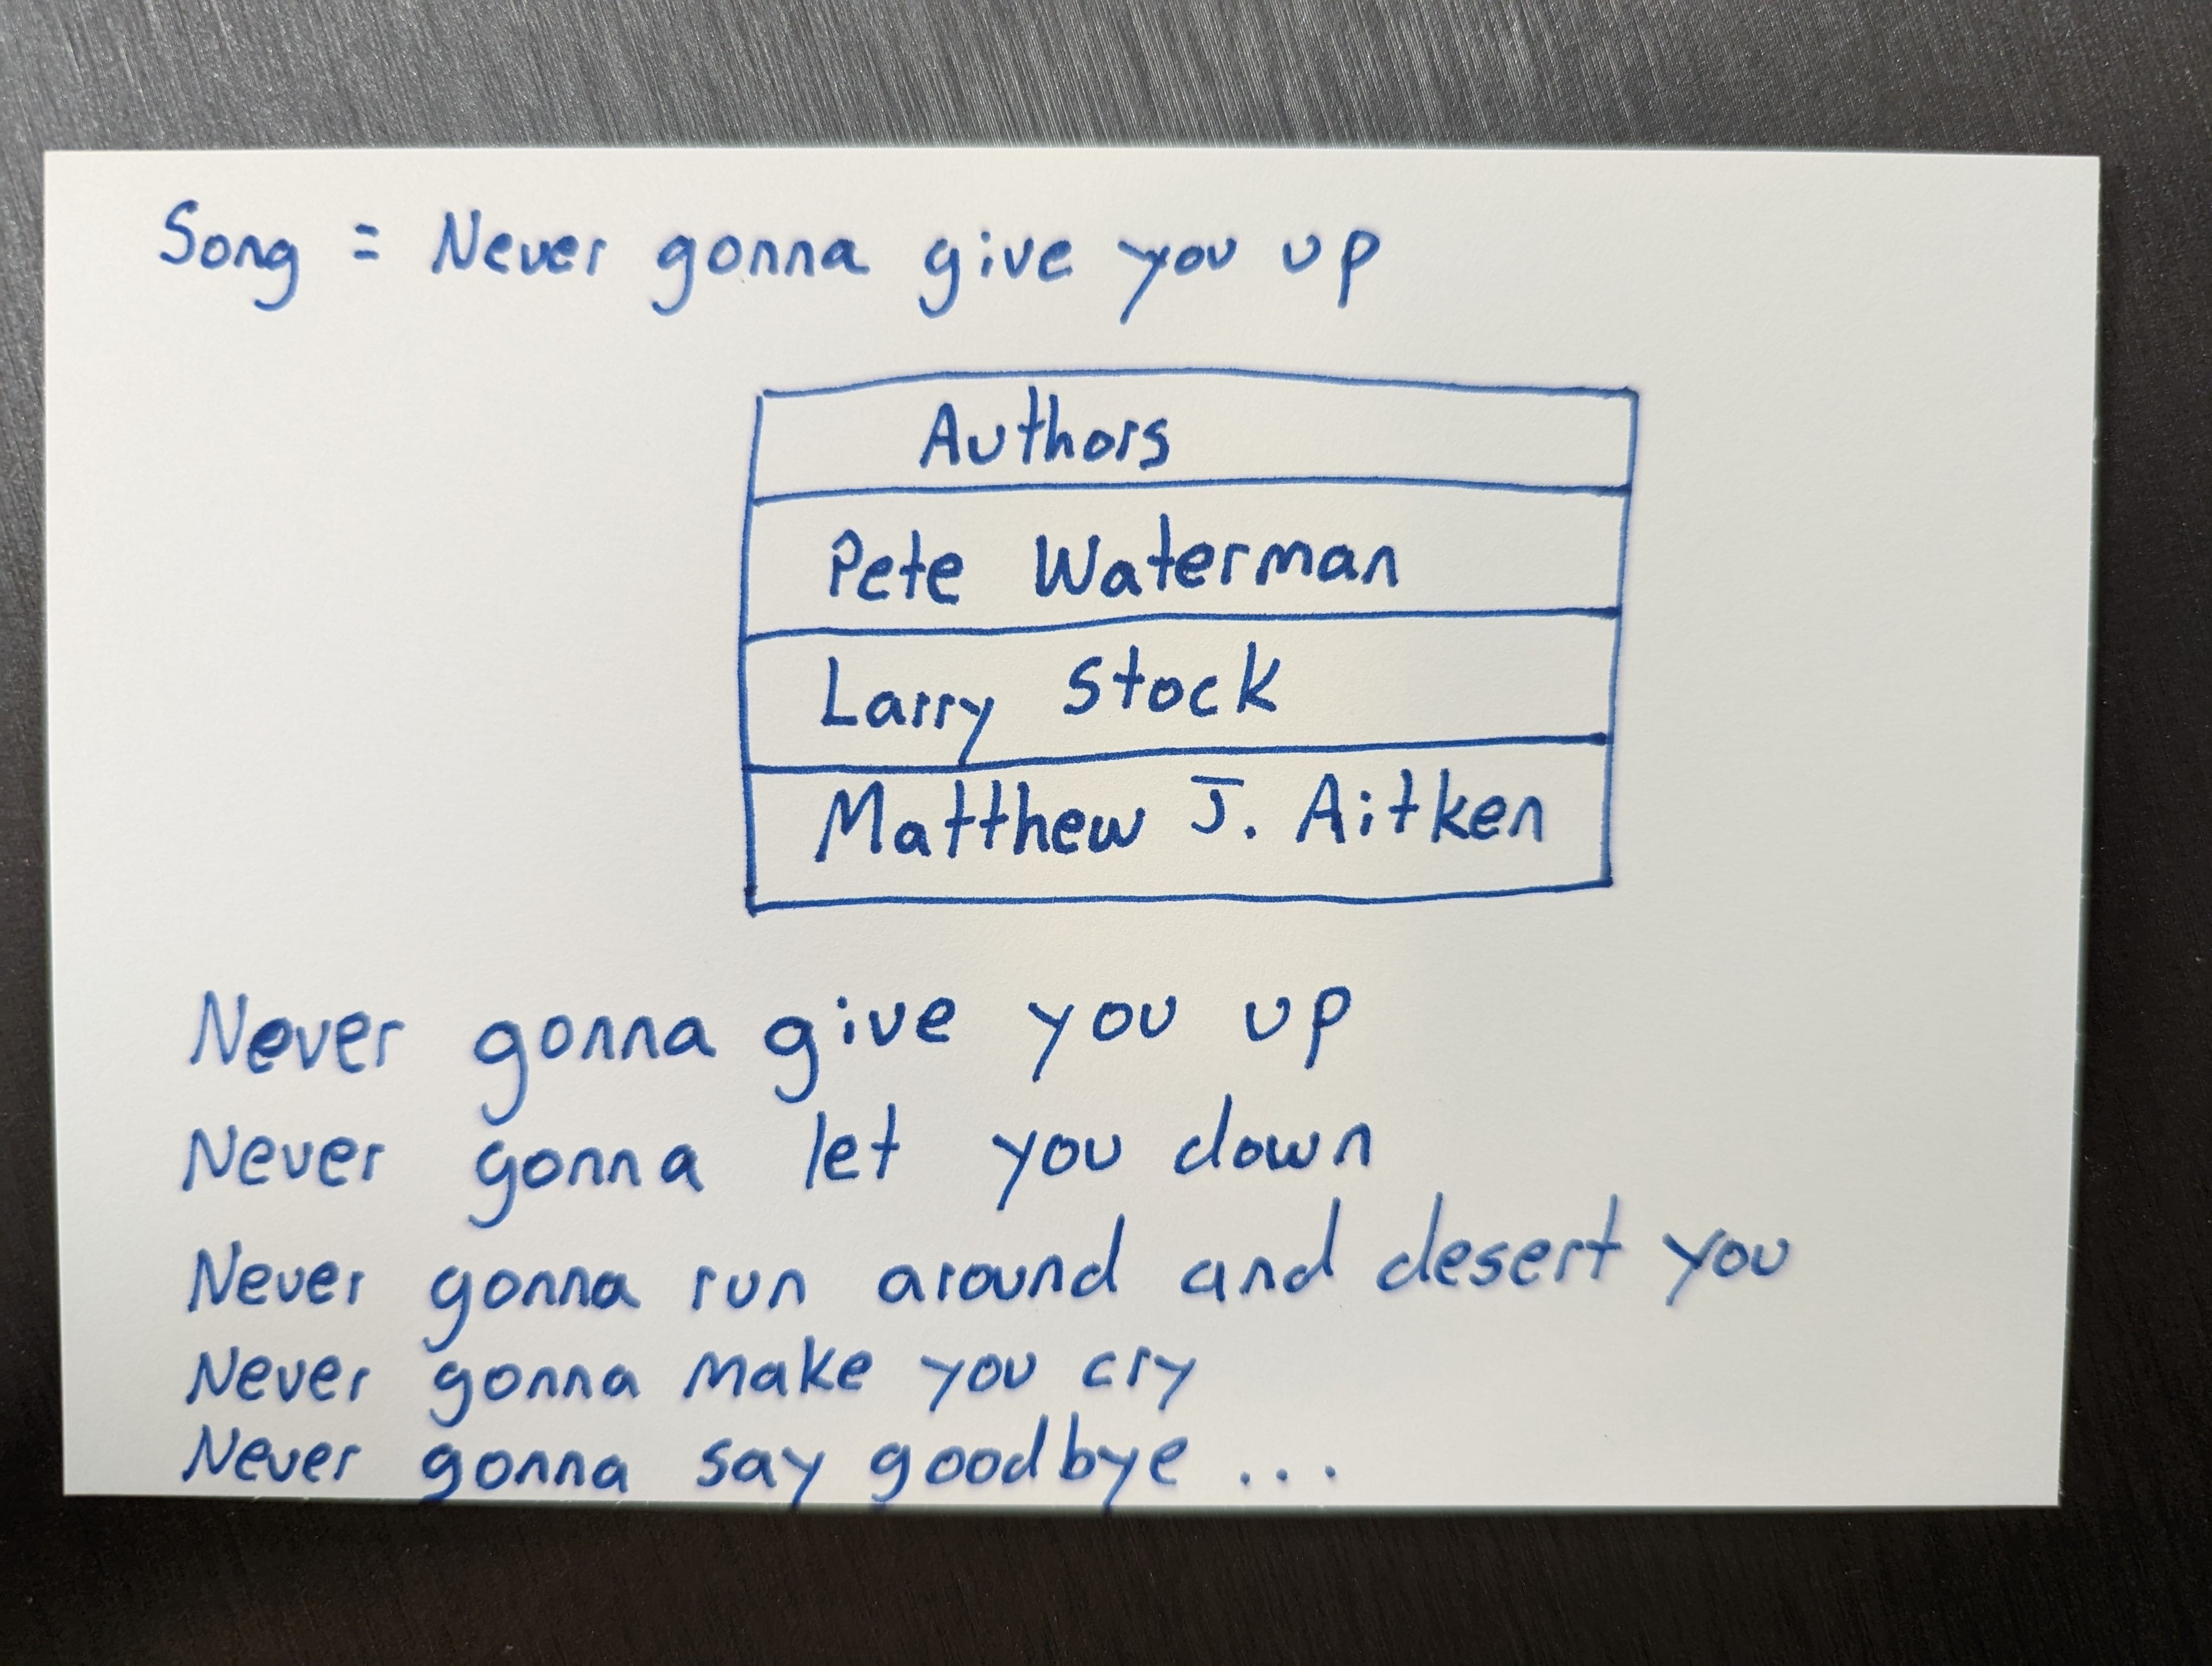

In [18]:
display.Image(image_data)

In [19]:
with open(f'./{DIR}/input.jpeg', 'wb') as f:
    f.write(image_data)

In [20]:
#bucket = gcs_client.bucket(PROJECT_ID)
#blob = bucket.blob(f'{SERIES}/{EXPERIMENT}/input.jpeg')

In [21]:
##blob.upload_from_string(image_data, content_type = 'image/png')
#blob.upload_from_filename(f'./{DIR}/input.jpeg')

In [22]:
#list(bucket.list_blobs(prefix = f'{SERIES}/{EXPERIMENT}'))

---
## Cloud Vision API
- Clients: https://cloud.google.com/vision/docs/libraries
  - Python: https://googleapis.dev/python/vision/latest/index.html

In [23]:
from google.cloud import vision
vision_client = vision.ImageAnnotatorClient()

In [24]:
image = vision.Image(content = image_data)
#image = vision.Image()
#image.source.image_uri = f'gs://{SERIES}/{EXPERIMENT}/input.jpeg'

# Language hint codes for handwritten OCR:
# en-t-i0-handwrit, mul-Latn-t-i0-handwrit
# Note: Use only one language hint code per request for handwritten OCR.
#image_context = vision.ImageContext(
#    language_hints=['en-t-i0-handwrit'])

response = vision_client.document_text_detection(image=image)

In [25]:
print('Full Text: {}'.format(response.full_text_annotation.text))
for page in response.full_text_annotation.pages:
    for block in page.blocks:
        print('\nBlock confidence: {}\n'.format(block.confidence))

        for paragraph in block.paragraphs:
            print('Paragraph confidence: {}'.format(
                paragraph.confidence))

            for word in paragraph.words:
                word_text = ''.join([
                    symbol.text for symbol in word.symbols
                ])
                print('Word text: {} (confidence: {})'.format(
                    word_text, word.confidence))

                for symbol in word.symbols:
                    print('\tSymbol: {} (confidence: {})'.format(
                        symbol.text, symbol.confidence))

Full Text: Song = Never gonna give you up
Authors
Pete Waterman
Larry Stock
Matthew J. Aitken
Never gonna give you up
Never gonna
let
down
you
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye

Block confidence: 0.9582565426826477

Paragraph confidence: 0.970086395740509
Word text: Song (confidence: 0.97908616065979)
	Symbol: S (confidence: 0.9724765419960022)
	Symbol: o (confidence: 0.9872287511825562)
	Symbol: n (confidence: 0.9758702516555786)
	Symbol: g (confidence: 0.9807690382003784)
Word text: = (confidence: 0.6065347194671631)
	Symbol: = (confidence: 0.6065347194671631)
Word text: Never (confidence: 0.9863415360450745)
	Symbol: N (confidence: 0.9817704558372498)
	Symbol: e (confidence: 0.9838935732841492)
	Symbol: v (confidence: 0.977084755897522)
	Symbol: e (confidence: 0.9950534701347351)
	Symbol: r (confidence: 0.9939054250717163)
Word text: gonna (confidence: 0.9934340715408325)
	Symbol: g (confidence: 0.9894640445709229)
	Symbol: o (con

In [26]:
image = vision.Image(content = image_data)

response = vision_client.label_detection(image = image)
labels = response.label_annotations
print('Labels:')

for label in labels:
    print(label.description)

Labels:
Handwriting
Rectangle
Font
Parallel
Slope
Number
Electric blue
Paper
Paper product
Writing


---
## Cloud Document AI
- Parse Forms: https://cloud.google.com/document-ai/docs/form-parser
- Parse Tables: https://cloud.google.com/document-ai/docs/process-tables

In [26]:
from google.cloud import documentai
docai_client = documentai.DocumentProcessorServiceClient(
    client_options = {"api_endpoint": f"us-documentai.googleapis.com"}
)

In [27]:
processor_list = docai_client.fetch_processor_types(
    request = documentai.FetchProcessorTypesRequest(
        parent = f'projects/{PROJECT_ID}/locations/us'
    )
)

In [28]:
processor_list

processor_types {
  name: "projects/1026793852137/locations/us/processorTypes/INVOICE_PROCESSOR"
  type_: "INVOICE_PROCESSOR"
  category: "SPECIALIZED"
  available_locations {
    location_id: "eu"
  }
  available_locations {
    location_id: "asia-southeast1"
  }
  available_locations {
    location_id: "us"
  }
  allow_creation: true
  launch_stage: GA
}
processor_types {
  name: "projects/1026793852137/locations/us/processorTypes/CUSTOM_EXTRACTION_PROCESSOR"
  type_: "CUSTOM_EXTRACTION_PROCESSOR"
  category: "CUSTOM"
  available_locations {
    location_id: "eu"
  }
  available_locations {
    location_id: "northamerica-northeast1"
  }
  available_locations {
    location_id: "europe-west2"
  }
  available_locations {
    location_id: "us"
  }
  available_locations {
    location_id: "asia-south1"
  }
  available_locations {
    location_id: "australia-southeast1"
  }
  available_locations {
    location_id: "europe-west3"
  }
  available_locations {
    location_id: "asia-southeast

In [29]:
processor = docai_client.create_processor(
    parent = f'projects/{PROJECT_ID}/locations/us',
    processor = documentai.Processor(
        display_name = 'form_processor',
        type_ = "FORM_PARSER_PROCESSOR"
    )
)

In [30]:
processor

name: "projects/1026793852137/locations/us/processors/f3a328d5cfe31acc"
type_: "FORM_PARSER_PROCESSOR"
display_name: "form_processor"
state: ENABLED
process_endpoint: "https://us-documentai.googleapis.com/v1/projects/1026793852137/locations/us/processors/f3a328d5cfe31acc:process"
create_time {
  seconds: 1665176649
  nanos: 682510000
}
default_processor_version: "projects/1026793852137/locations/us/processors/f3a328d5cfe31acc/processorVersions/pretrained-form-parser-v1.0-2020-09-23"

In [31]:
result = docai_client.process_document(
    request = documentai.ProcessRequest(
        name = processor.name,
        raw_document = documentai.RawDocument(
            content = image_data,
            mime_type = 'image/jpeg'
        )
    )
)

In [32]:
documents = [result.document]

wrangle functions:

In [34]:
def tab_wrangle(cell,document_text,enum):
  response = ""
  for segment in cell.text_anchor.text_segments:
    start_index = segment.start_index
    end_index = segment.end_index
    response += document_text[start_index:end_index].strip()
  return response

def field_wrangle(document_text,fields):
  print("\nDetected Fields:")
  t = PrettyTable(['field_name','field_value'])
  for form_field in fields:
    key = ""
    for segment in form_field.field_name.text_anchor.text_segments:
      key += document_text[segment.start_index:segment.end_index].strip()
    value = ""
    for segment in form_field.field_value.text_anchor.text_segments:
      value += document_text[segment.start_index:segment.end_index].strip()
    t.add_row([key,value])
    #print(key,':',value)  
  print(t)

def entity_wrangle(entities):
  print("\nDetected Entities:")
  t = PrettyTable(['Type', 'Value', 'Confidence'])
  for entity in entities:
    entity_type = entity.type_
    value = entity.mention_text
    confience = round(entity.confidence,4)
    t.add_row([entity_type, value, confience])
  print(t)

def wrangle(document):
  print("Document Text:\n{}".format(document.document.text))
  for page in document.document.pages:
      print("\nPage Number: {}".format(page.page_number))
      field_wrangle(document.document.text, page.form_fields)
      entity_wrangle(document.document.entities)
      for table_num, table in enumerate(page.tables):
        print("\nTable Number: {}".format(table_num))
        for row_num, row in enumerate(table.header_rows):
          cells = [tab_wrangle(cell.layout,document.document.text, enum) for enum, cell in enumerate(row.cells)]
          if row_num==0: t = PrettyTable(["Column_{}".format(l) for l in list(range(len(cells)))])
          t.add_row(cells)
        for row_num, row in enumerate(table.body_rows):
          cells = [tab_wrangle(cell.layout,document.document.text, enum) for enum, cell in enumerate(row.cells)]
          t.add_row(cells)
        print(t)

In [35]:
wrangle(result)

Document Text:
Song = Never gonna give you up
Authors
Pete Waterman
Larry Stock
Matthew
J. Aitken
Never gonna
Never gonna give you up
let
you
down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye


Page Number: 1

Detected Fields:
+------------+-------------+
| field_name | field_value |
+------------+-------------+
|   Never    |    Never    |
+------------+-------------+

Detected Entities:
+------+-------+------------+
| Type | Value | Confidence |
+------+-------+------------+
+------+-------+------------+

Table Number: 0
+----------+-----------+
| Column_0 |  Column_1 |
+----------+-----------+
| Authors  |           |
|   Pete   |  Waterman |
|  Larry   |   Stock   |
| Matthew  | J. Aitken |
+----------+-----------+


---
## Cloud Data Loss Prevention (DLP)

In [36]:
import google.cloud.dlp
dlp_client = google.cloud.dlp_v2.DlpServiceClient()

In [37]:
# try first and last name - get a full list and try again
#info_types = [{"name": "FIRST_NAME"}, {"name": "LAST_NAME"}]
info_types = ["GENDER", "AGE", "URL", "FIRST_NAME", "LAST_NAME", "LOCATION", "TIME", "STREET_ADDRESS"]
info_types = [{"name": info_type} for info_type in info_types]
image_redaction_configs = []
if info_types is not None:
  for info_type in info_types:
    image_redaction_configs.append({"info_type": info_type})

inspect_config = {
  "min_likelihood": None,
  "info_types": info_types,
  "include_quote": True
}

mime_type = "image/jpeg"

supported_content_types = {
  None: 0,  # "Unspecified"
  "image/jpeg": 1,
  "image/bmp": 2,
  "image/png": 3,
  "image/svg": 4,
  "text/plain": 5,
}
content_type_index = supported_content_types.get(mime_type, 0)

byte_item = {"type_": content_type_index, "data": image_data}

parent = f"projects/{PROJECT_ID}"

response = dlp_client.redact_image(
    request = {
        "parent": parent,
        "inspect_config": inspect_config,
        "image_redaction_configs": image_redaction_configs,
        "byte_item": byte_item,
        "include_findings": True
    }
)



In [38]:
type(response.redacted_image)

bytes

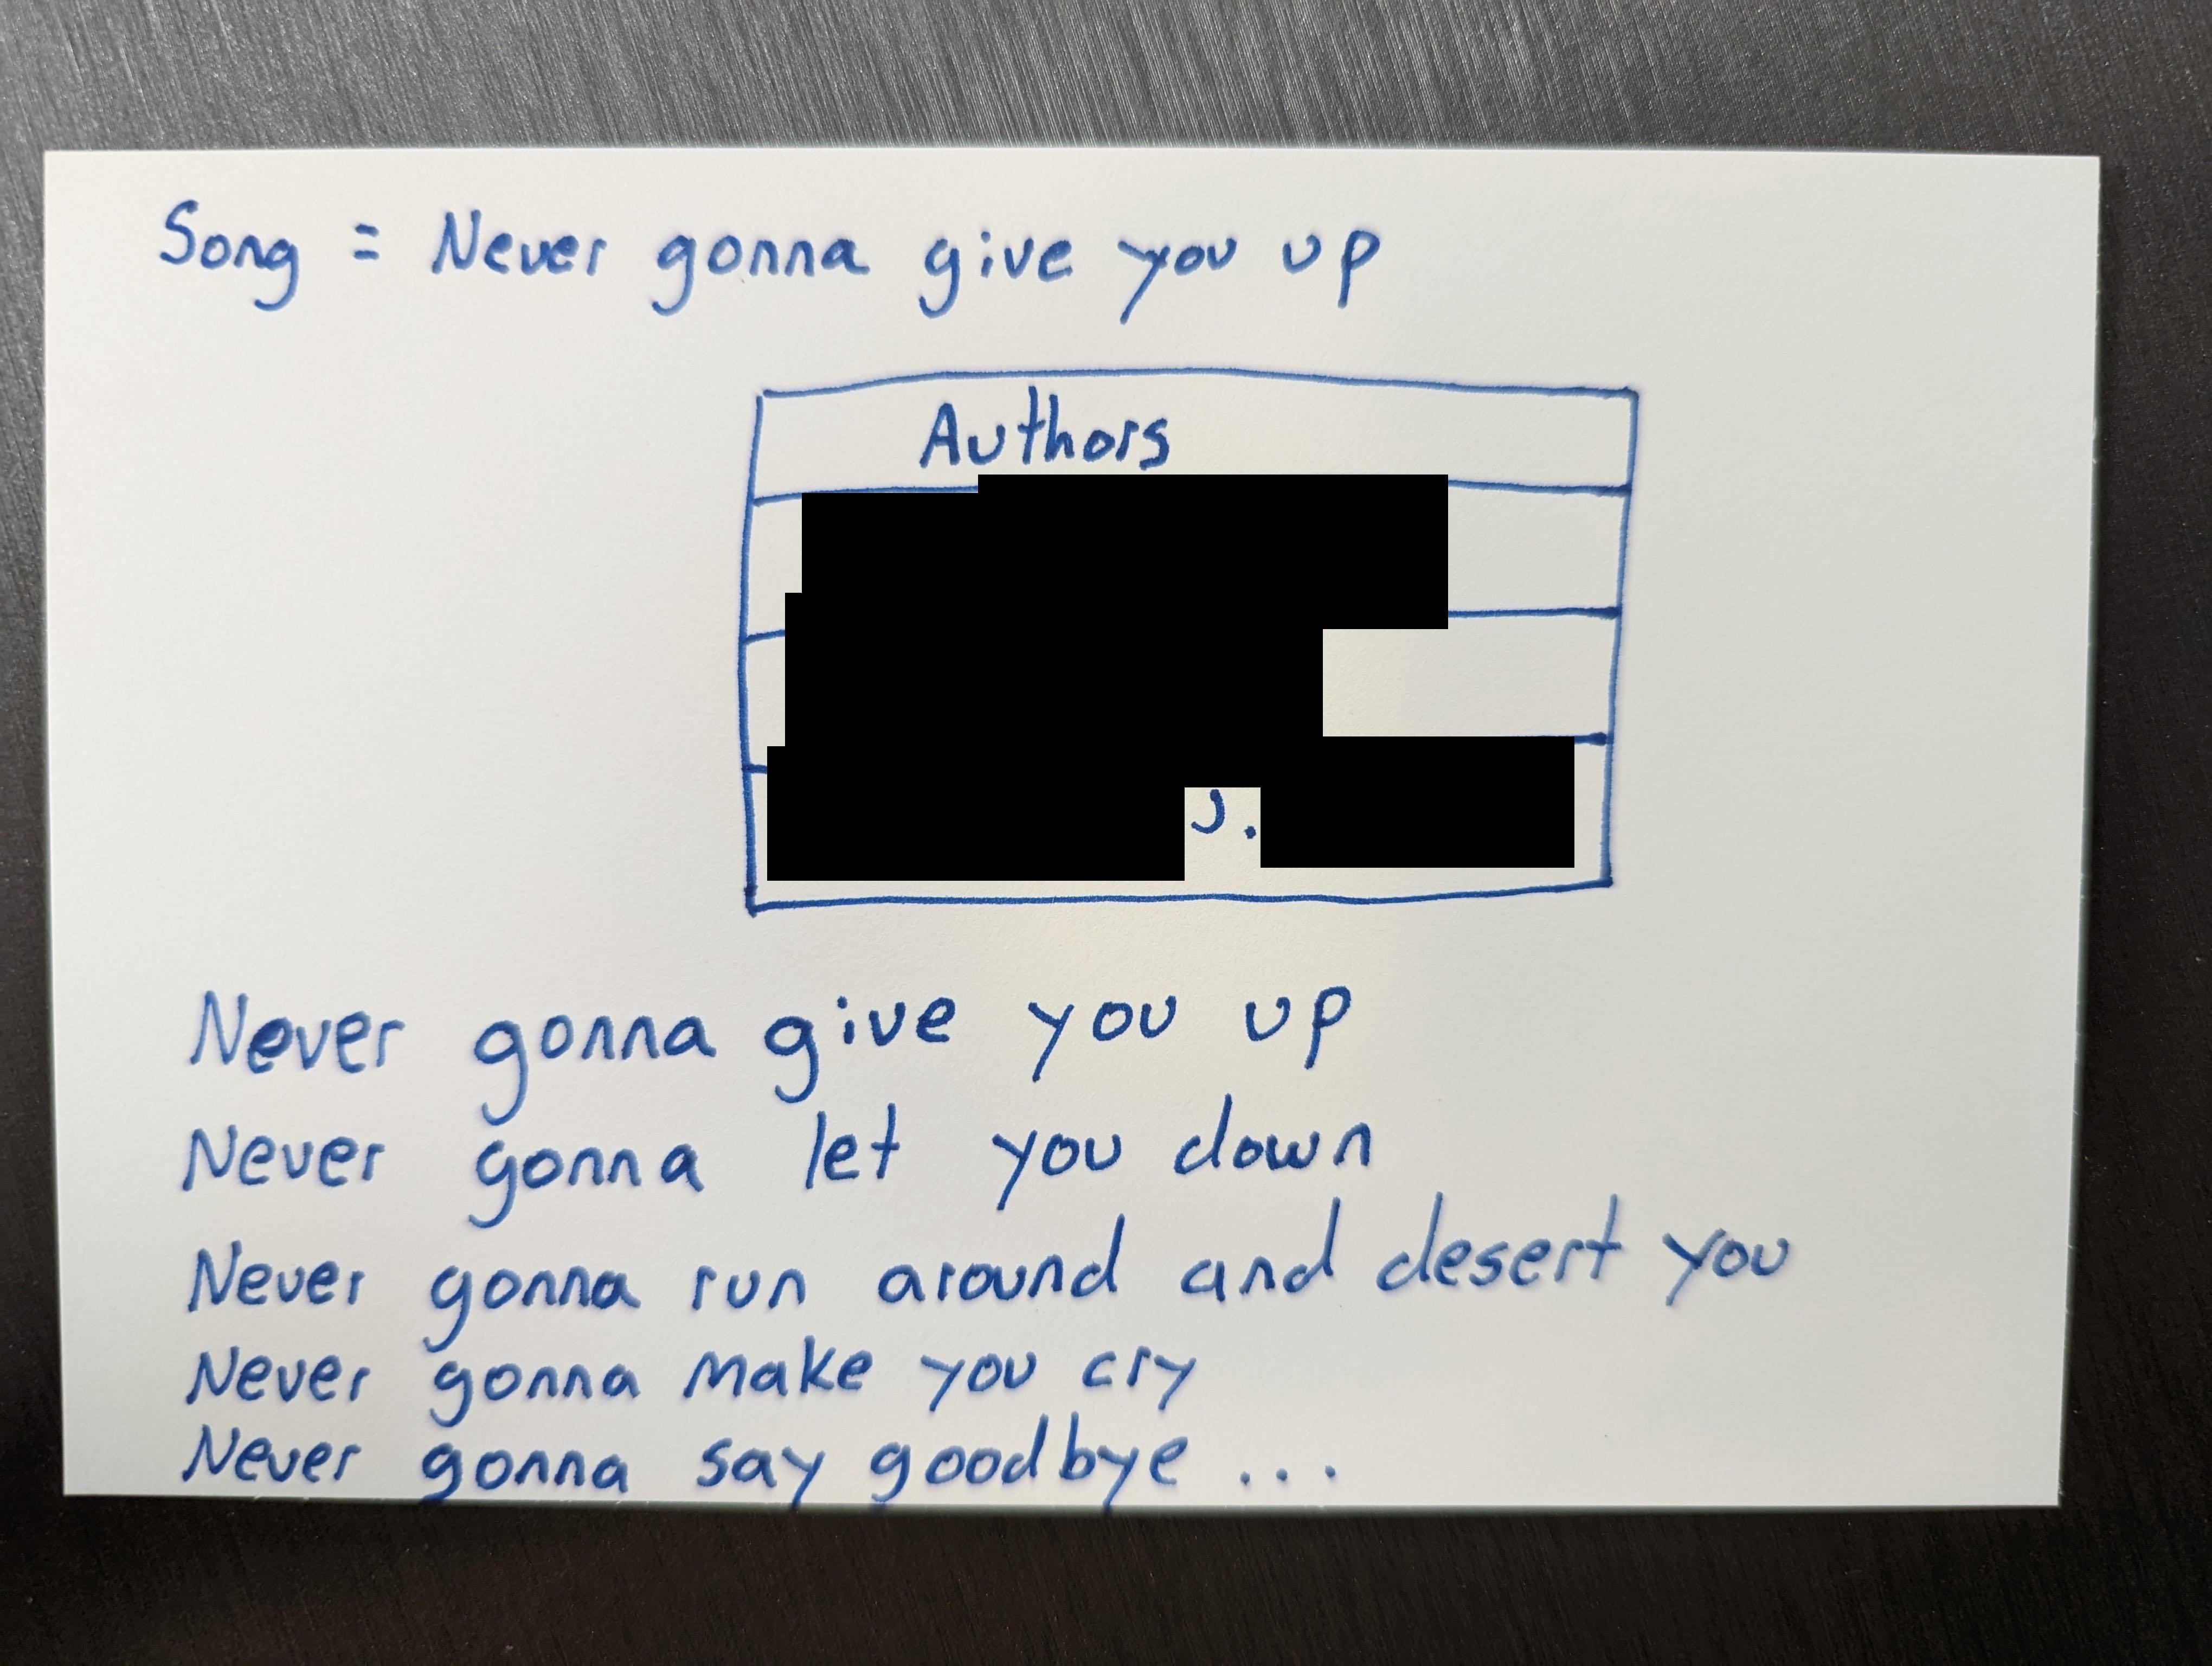

In [39]:
display.Image(response.redacted_image, width = 600, height=900)

In [63]:
response.extracted_text

'Song = Never gonna give you up Authors Pete Waterman Larry Stock Matthew J. Aitken Never gonna give you up Never gonna let You down Never gonna run around and desert you Never gonna make you cry Never gonna say good bye '

In [64]:
response.inspect_result

findings {
  quote: "Pete"
  info_type {
    name: "FIRST_NAME"
  }
  likelihood: LIKELY
  location {
    content_locations {
      image_location {
        bounding_boxes {
          top: 909
          left: 1479
          width: 341
          height: 261
        }
      }
    }
  }
  create_time {
    seconds: 1665173056
    nanos: 411000000
  }
  finding_id: "2022-10-07T20:04:16.442058Z5787989884653784421"
}
findings {
  quote: "Waterman"
  info_type {
    name: "LAST_NAME"
  }
  likelihood: LIKELY
  location {
    content_locations {
      image_location {
        bounding_boxes {
          top: 875
          left: 1804
          width: 867
          height: 285
        }
      }
    }
  }
  create_time {
    seconds: 1665173056
    nanos: 411000000
  }
  finding_id: "2022-10-07T20:04:16.442125Z4980152731382073140"
}
findings {
  quote: "Larry"
  info_type {
    name: "FIRST_NAME"
  }
  likelihood: LIKELY
  location {
    content_locations {
      image_location {
        bounding_

---
## Cloud Natural Language
- Clients: https://cloud.google.com/natural-language/docs/reference/libraries
  - Python: https://googleapis.dev/python/language/latest/usage.html

In [40]:
lyric = """
Never gonna give you up. 
Never gonna let you down. 
Never gonna run around and desert you. 
Never gonna make you cry. 
Never gonna say goodbye. 
Never gonna tell a lie and hurt you.
"""
print(lyric)


Never gonna give you up. 
Never gonna let you down. 
Never gonna run around and desert you. 
Never gonna make you cry. 
Never gonna say goodbye. 
Never gonna tell a lie and hurt you.



In [41]:
from google.cloud import language_v1
lang_client = language_v1.LanguageServiceClient()

In [42]:
document = language_v1.Document(
    content = lyric,
    type_ = language_v1.Document.Type.PLAIN_TEXT
)
sentiment = lang_client.analyze_entity_sentiment(request = {'document': document})

In [43]:
sentiment

entities {
  name: "desert"
  type_: LOCATION
  salience: 0.598796010017395
  mentions {
    text {
      content: "desert"
      begin_offset: -1
    }
    type_: COMMON
    sentiment {
      magnitude: 0.10000000149011612
      score: -0.10000000149011612
    }
  }
  sentiment {
    magnitude: 0.10000000149011612
    score: -0.10000000149011612
  }
}
entities {
  name: "lie"
  type_: OTHER
  salience: 0.21747489273548126
  mentions {
    text {
      content: "lie"
      begin_offset: -1
    }
    type_: COMMON
    sentiment {
      magnitude: 0.800000011920929
      score: -0.800000011920929
    }
  }
  sentiment {
    magnitude: 0.800000011920929
    score: -0.800000011920929
  }
}
entities {
  name: "goodbye"
  type_: OTHER
  salience: 0.18372908234596252
  mentions {
    text {
      content: "goodbye"
      begin_offset: -1
    }
    type_: COMMON
    sentiment {
      magnitude: 0.5
      score: -0.5
    }
  }
  sentiment {
    magnitude: 0.5
    score: -0.5
  }
}
language: "en

In [44]:
syntax = lang_client.analyze_syntax(request = {'document': document})

In [45]:
syntax

sentences {
  text {
    content: "Never gonna give you up."
    begin_offset: -1
  }
}
sentences {
  text {
    content: "Never gonna let you down."
    begin_offset: -1
  }
}
sentences {
  text {
    content: "Never gonna run around and desert you."
    begin_offset: -1
  }
}
sentences {
  text {
    content: "Never gonna make you cry."
    begin_offset: -1
  }
}
sentences {
  text {
    content: "Never gonna say goodbye."
    begin_offset: -1
  }
}
sentences {
  text {
    content: "Never gonna tell a lie and hurt you."
    begin_offset: -1
  }
}
tokens {
  text {
    content: "Never"
    begin_offset: -1
  }
  part_of_speech {
    tag: ADV
  }
  dependency_edge {
    head_token_index: 1
    label: NEG
  }
  lemma: "Never"
}
tokens {
  text {
    content: "gon"
    begin_offset: -1
  }
  part_of_speech {
    tag: VERB
  }
  dependency_edge {
    head_token_index: 1
    label: ROOT
  }
  lemma: "gon"
}
tokens {
  text {
    content: "na"
    begin_offset: -1
  }
  part_of_speech {
  

In [46]:
classify = lang_client.classify_text(request = {'document': document})

In [47]:
classify

categories {
  name: "/Arts & Entertainment/Music & Audio"
  confidence: 0.7099999785423279
}

---
## Cloud Text-to-Speech
- https://cloud.google.com/text-to-speech

Setup the Python Client:
- https://googleapis.dev/python/texttospeech/latest/texttospeech_v1/text_to_speech.html
- list of voices with samples: https://cloud.google.com/text-to-speech/docs/voices

In [48]:
from google.cloud import texttospeech
speech_client = texttospeech.TextToSpeechClient()

In [49]:
synth = texttospeech.SynthesisInput(text = lyric)
voice =texttospeech.VoiceSelectionParams(language_code = "en-us", name = 'en-US-Wavenet-A')
audio = texttospeech.AudioConfig(audio_encoding = texttospeech.AudioEncoding.MP3)
response = speech_client.synthesize_speech(input = synth, voice = voice, audio_config=audio)
with open(f"./{DIR}/lyric.mp3", "wb") as out:
  out.write(response.audio_content)
  print(f'./{DIR}/lyric.mp3')
display.Audio(filename = f"./{DIR}/lyric.mp3")

./temp/api_fun/lyric.mp3


---
## Cloud Speech To Text

[Supported Voices and Languages](https://cloud.google.com/text-to-speech/docs/voices)

Python Client
- Clients: https://cloud.google.com/speech-to-text/docs/libraries
  - Python: https://googleapis.dev/python/speech/latest/index.html

In [50]:
from google.cloud import speech_v1p1beta1 as stt
stt_client = stt.SpeechClient()

In [51]:
config = stt.RecognitionConfig(
    encoding = stt.RecognitionConfig.AudioEncoding.MP3,
    sample_rate_hertz = 16000,
    language_code = "en-US"
)
text = stt_client.recognize(
    config = config,
    audio = stt.RecognitionAudio(content = response.audio_content)
)

In [52]:
text

results {
  alternatives {
    transcript: "Never Going To Give You Up never going to let you down never gonna run around and desert you never going to make you cry never going to say goodbye"
    confidence: 0.9733787775039673
  }
  result_end_time {
    seconds: 11
    nanos: 520000000
  }
  language_code: "en-us"
}
total_billed_time {
  seconds: 15
}

In [53]:
text.results[0].alternatives[0].transcript

'Never Going To Give You Up never going to let you down never gonna run around and desert you never going to make you cry never going to say goodbye'

In [54]:
lyric = text.results[0].alternatives[0].transcript
lyric

'Never Going To Give You Up never going to let you down never gonna run around and desert you never going to make you cry never going to say goodbye'

---
## Cloud Translate

Python Client
- https://googleapis.dev/python/translation/latest/client.html

### Detect Language (Basic Edition)

In [55]:
from google.cloud import translate_v2 as translate
translate_client = translate.Client()

In [56]:
translate_client.detect_language(lyric)['language']

'en'

---
### Translation

Create a list with multiple translation of lyric:

Supported Languages: https://cloud.google.com/translate/docs/languages

Rick speaks French?

In [57]:
print(translate_client.translate(lyric,target_language='fr',format_='text')['translatedText'])

Je ne t'abandonnerai jamais, je ne te laisserai jamais tomber, je ne courrai jamais et je déserterai, tu ne te feras jamais pleurer, je ne te dirai jamais au revoir.


What languages can Rick speak?

In [58]:
languages = translate_client.get_languages(target_language='en')
for language in languages: print(language['name'])

Afrikaans
Akan
Albanian
Amharic
Arabic
Armenian
Assamese
Aymara
Azerbaijani
Bambara
Basque
Belarusian
Bengali
Bhojpuri
Bosnian
Bulgarian
Catalan
Cebuano
Chichewa
Chinese (Simplified)
Chinese (Traditional)
Corsican
Croatian
Czech
Danish
Divehi
Dogri
Dutch
English
Esperanto
Estonian
Ewe
Filipino
Finnish
French
Frisian
Galician
Ganda
Georgian
German
Goan Konkani
Greek
Guarani
Gujarati
Haitian Creole
Hausa
Hawaiian
Hebrew
Hindi
Hmong
Hungarian
Icelandic
Igbo
Iloko
Indonesian
Irish
Italian
Japanese
Javanese
Kannada
Kazakh
Khmer
Kinyarwanda
Korean
Krio
Kurdish (Kurmanji)
Kurdish (Sorani)
Kyrgyz
Lao
Latin
Latvian
Lingala
Lithuanian
Luxembourgish
Macedonian
Maithili
Malagasy
Malay
Malayalam
Maltese
Manipuri (Meitei Mayek)
Maori
Marathi
Mizo
Mongolian
Myanmar (Burmese)
Nepali
Northern Sotho
Norwegian
Odia (Oriya)
Oromo
Pashto
Persian
Polish
Portuguese
Punjabi
Quechua
Romanian
Russian
Samoan
Sanskrit
Scots Gaelic
Serbian
Sesotho
Shona
Sindhi
Sinhala
Slovak
Slovenian
Somali
Spanish
Sundanese
Swah

Translate the lyrics into all of Rick's languages!

In [59]:
for i, language in enumerate(languages):
  languages[i]['lyric'] = translate_client.translate(lyric,target_language=language['language'],format_='text')['translatedText']

In [60]:
for language in languages:
  print(language['name'],'\n',language['lyric'],"\n")

Afrikaans 
 Gaan jou nooit opgee nie gaan jou nooit in die steek laat nie gaan nooit rondhardloop en woestyn nie jy gaan jou nooit laat huil nie gaan nooit totsiens sê nie 

Akan 
 Never Going To Give You Up never going to let you down never gonna run around and desert wo da sɛ wobɛma woasu da sɛ wobɛka akwaaba 

Albanian 
 Kurrë nuk do të të heq dorë, kurrë nuk do të të zhgënjejë kurrë nuk do të vrapoj dhe do të braktisësh, kurrë nuk do të të bëj të qash kurrë nuk do të thuash lamtumirë 

Amharic 
 መቼም የማይሰጥህ ተስፋ አይቆርጥም መቼም አይሮጥህም በረሀም አታስለቅስህም መቼም ሰላም አትልም 

Arabic 
 لن تخذلك أبدًا ولن تخذلك أبدًا ولن تهرب ولن تجعلك تبكي أبدًا ولن تقول وداعًا أبدًا 

Armenian 
 Երբեք չեմ պատրաստվում քեզ հանձնել, երբեք չեմ պատրաստվում քեզ հուսալքեցնել, երբեք չեմ վազի ու լքի, երբեք քեզ լաց չեմ տա, երբեք չեմ պատրաստվում հրաժեշտ տալ 

Assamese 
 নেভাৰ গোইং টু গিভ ইউ আপ কেতিয়াও তোমাক নিৰাশ কৰিবলৈ যোৱা নাই কেতিয়াও দৌৰি ফুৰা আৰু মৰুভূমি তুমি কেতিয়াও কান্দিব নোৱাৰা কেতিয়াও বিদায় ল'ব নোৱাৰা 

Aymara 
 Ja

### Detect the languages?

In [61]:
languages[0]

{'language': 'af',
 'name': 'Afrikaans',
 'lyric': 'Gaan jou nooit opgee nie gaan jou nooit in die steek laat nie gaan nooit rondhardloop en woestyn nie jy gaan jou nooit laat huil nie gaan nooit totsiens sê nie'}

In [62]:
for i, language in enumerate(languages):
  languages[i]['detected_language'] = translate_client.detect_language(language['lyric'])['language']

In [63]:
for language in languages:
  print("For lyrics in {} ({}) the detect language was {}.".format(language['name'],language['language'],language['detected_language']))

For lyrics in Afrikaans (af) the detect language was af.
For lyrics in Akan (ak) the detect language was ak.
For lyrics in Albanian (sq) the detect language was sq.
For lyrics in Amharic (am) the detect language was am.
For lyrics in Arabic (ar) the detect language was ar.
For lyrics in Armenian (hy) the detect language was hy.
For lyrics in Assamese (as) the detect language was as.
For lyrics in Aymara (ay) the detect language was ay.
For lyrics in Azerbaijani (az) the detect language was az.
For lyrics in Bambara (bm) the detect language was kri.
For lyrics in Basque (eu) the detect language was eu.
For lyrics in Belarusian (be) the detect language was be.
For lyrics in Bengali (bn) the detect language was bn.
For lyrics in Bhojpuri (bho) the detect language was bho.
For lyrics in Bosnian (bs) the detect language was hr.
For lyrics in Bulgarian (bg) the detect language was bg.
For lyrics in Catalan (ca) the detect language was ca.
For lyrics in Cebuano (ceb) the detect language was c

---
## Cloud Text-to-Speech - After Translation

### French

In [89]:
print(languages[34]['name'],'\n',languages[34]['lyric'])

French 
 Je ne t'abandonnerai jamais, je ne te laisserai jamais tomber, je ne courrai jamais et je déserterai, tu ne te feras jamais pleurer, je ne te dirai jamais au revoir.


In [64]:
synth = texttospeech.SynthesisInput(text = languages[34]['lyric'])
voice =texttospeech.VoiceSelectionParams(language_code = "fr-FR", name = 'fr-FR-Wavenet-B')
audio = texttospeech.AudioConfig(audio_encoding = texttospeech.AudioEncoding.MP3)
response = speech_client.synthesize_speech(input = synth, voice = voice, audio_config=audio)
with open(f"./{DIR}/lyric_fr.mp3", "wb") as out:
  out.write(response.audio_content)
  print(f'./{DIR}/lyric_fr.mp3')
display.Audio(filename = f"./{DIR}/lyric_fr.mp3")

./temp/api_fun/lyric_fr.mp3


## Clean Up

In [65]:
# remove docai processor created above
response = docai_client.delete_processor(name = processor.name)
response